In [9]:
import pandas as pd
import numpy as np

The results are based on two values, one in Colorado and one in Washington.

In [58]:
def get_case(filename):
    # df = pd.read_csv('wa-pv-2006/DA_47.45_-121.95_2006_UPV_50MW_60_Min.csv')
    df = pd.read_csv(filename)
    total = df['Power(MW)'].sum()
    vals = df['Power(MW)'].to_numpy()
    vals = np.sort(vals) / total
    vals = np.array(vals[::-1])
    vals = np.cumsum(vals)
    return vals

filenames = ['wa-pv-2006/DA_47.45_-122.15_2006_DPV_7MW_60_Min.csv']
valsplot = []
for f in filenames:
    valsplot.append(get_case(f))

valsplot = np.stack(valsplot)
print(valsplot)

[[6.06517362e-04 1.21303472e-03 1.81320112e-03 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]]


80% of the productive hours are in the 22.0% most productive hours
56.0% of the hours have no production


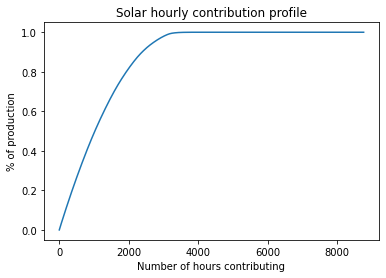

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
for i in range(len(valsplot)):
    plt.plot(valsplot[i])
    plt.title('Solar hourly contribution profile')
    plt.ylabel('% of production')
    plt.xlabel('Number of hours contributing')
fig.savefig('solar.png', bbox_inches='tight')

for i in range(len(valsplot)):
    print(f'80% of the productive hours are in the {100 * float(np.where(valsplot[i] > 0.8)[0][0]) / 8760.:.1f}% most productive hours')
    print(f'{100 * float(8760 - np.where(valsplot[i] > 0.999999999)[0][0]) / 8760.:.1f}% of the hours have no production')

<Figure size 432x288 with 0 Axes>